In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [2]:
astro = pd.read_csv("E:/Python Programs/Astro_EuroMillions_1.csv")
sf = pd.read_csv("E:/Python Programs/Astro_EuroMillions_1.csv")
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,Train,Tuesday,Ashwini,NaN,NaN,NaN,3.0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,Train,Tuesday,Bharani,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,Train,Tuesday,Krittika,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,Train,Tuesday,Rohini,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,Train,Tuesday,Mrigashirsha,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [3]:
astro.fillna(value={"Pada-1":0, "Pada-2":0, "Pada-3":0, "Pada-4":0},inplace=True)

In [4]:
astro["Pada-1"] = astro["Pada-1"].astype(dtype='int32')
astro["Pada-2"] = astro["Pada-2"].astype(dtype='int32')
astro["Pada-3"] = astro["Pada-3"].astype(dtype='int32')
astro["Pada-4"] = astro["Pada-4"].astype(dtype='int32')

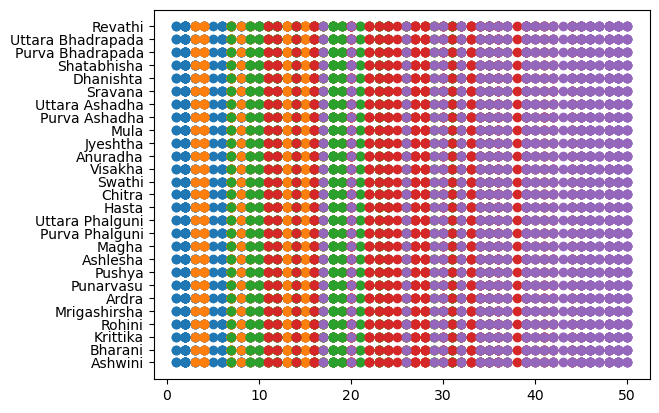

In [5]:
plt.scatter(x="1st Num", y="Nakshatra", data=astro)
plt.scatter(x="2nd Num", y="Nakshatra", data=astro)
plt.scatter(x="3rd Num", y="Nakshatra", data=astro)
plt.scatter(x="4th Num", y="Nakshatra", data=astro)
plt.scatter(x="5th Num", y="Nakshatra", data=astro)
plt.show()

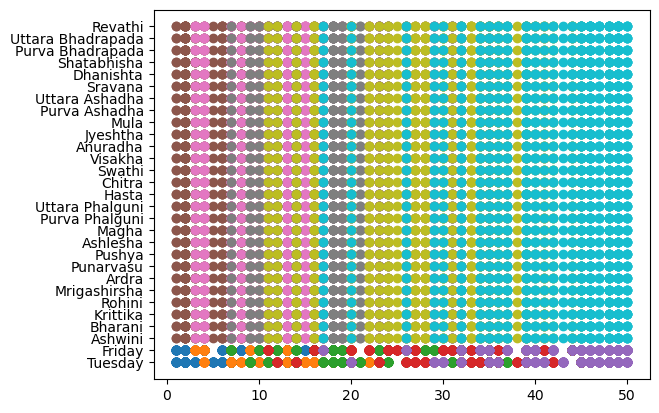

In [6]:
plt.scatter(x="1st Num", y="Day", data=astro)
plt.scatter(x="2nd Num", y="Day", data=astro)
plt.scatter(x="3rd Num", y="Day", data=astro)
plt.scatter(x="4th Num", y="Day", data=astro)
plt.scatter(x="5th Num", y="Day", data=astro)
plt.scatter(x="1st Num", y="Nakshatra", data=astro)
plt.scatter(x="2nd Num", y="Nakshatra", data=astro)
plt.scatter(x="3rd Num", y="Nakshatra", data=astro)
plt.scatter(x="4th Num", y="Nakshatra", data=astro)
plt.scatter(x="5th Num", y="Nakshatra", data=astro)
plt.show()

In [7]:
astro.tail()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
1570,Test,Tuesday,Dhanishta,0,0,0,0,2,32,35,36,39,7,8,2 32 35 36 39 7 8
1571,Test,Tuesday,Shatabhisha,0,0,0,0,2,32,35,36,39,7,8,2 32 35 36 39 7 8
1572,Test,Tuesday,Purva Bhadrapada,0,8,0,0,2,32,35,36,39,7,8,2 32 35 36 39 7 8
1573,Test,Tuesday,Uttara Bhadrapada,0,0,0,4,2,32,35,36,39,7,8,2 32 35 36 39 7 8
1574,Test,Tuesday,Revathi,0,0,0,0,2,32,35,36,39,7,8,2 32 35 36 39 7 8


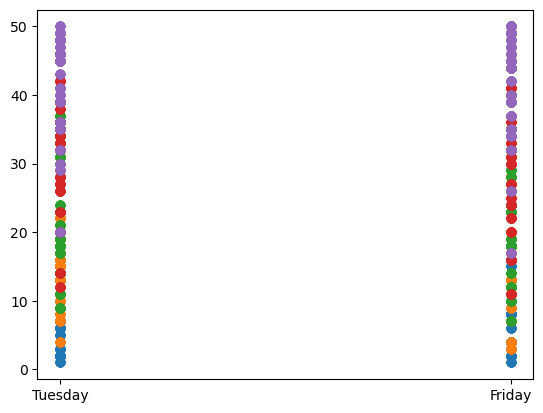

In [8]:
plt.scatter(x="Day",y="1st Num", data=astro)
plt.scatter(x="Day",y="2nd Num", data=astro)
plt.scatter(x="Day",y="3rd Num", data=astro)
plt.scatter(x="Day",y="4th Num", data=astro)
plt.scatter(x="Day",y="5th Num", data=astro)
plt.show()

In [9]:
astro[["Day","5th Num"]].groupby(["Day"]).value_counts()

Day      5th Num
Friday   49         110
         50          82
         45          57
         34          56
         37          56
         44          56
         46          56
         47          55
         42          55
         32          29
         39          28
         17          27
         26          27
         48          27
         40          27
         35          27
Tuesday  46         136
         48         112
         49          82
         45          81
         36          55
         39          54
         20          31
         43          29
         47          28
         32          28
         35          28
         40          28
         41          27
         30          27
         29          27
         50          27
Name: count, dtype: int64

<Axes: xlabel='Day', ylabel='1st Num'>

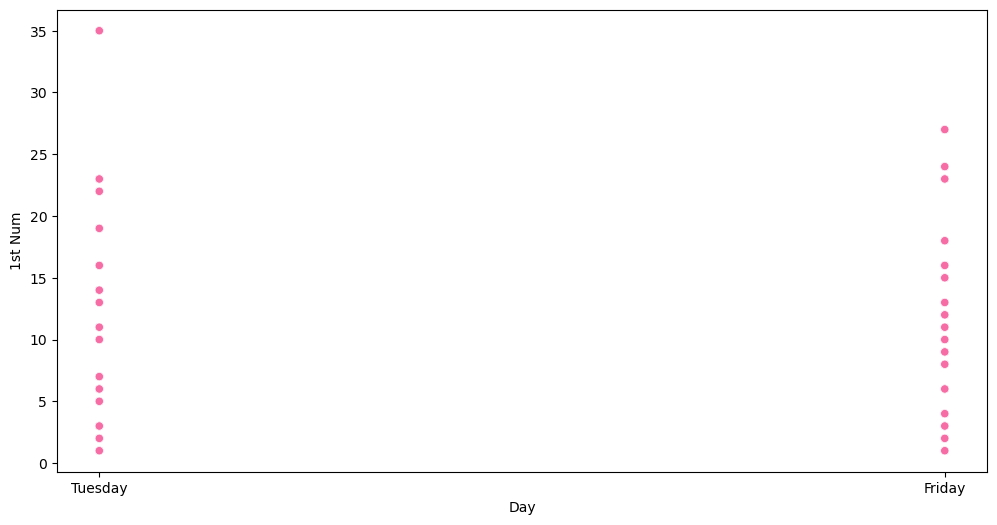

In [10]:
plt.figure(figsize=[12,6])
sns.scatterplot(x="Day",y="1st Num", data=astro,hue="Nakshatra",legend=False)

In [46]:
df = astro[(astro["Day"]=="Friday") & ((astro["Nakshatra"]=="Krittika") | (astro["Nakshatra"]=="Rohini") |  
                                       (astro["Nakshatra"]=="Pushya") | (astro["Nakshatra"]=="Magha") | 
                                       (astro["Nakshatra"]=="Mula") | (astro["Nakshatra"]=="Purva Bhadrapada") | 
                                       (astro["Nakshatra"]=="Hasta") | (astro["Nakshatra"]=="Uttara Bhadrapada"))]
df.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
29,Train,Friday,Krittika,0,0,0,0,4,7,18,39,50,3,8,4 7 18 39 50 3 8
30,Train,Friday,Rohini,0,0,0,0,4,7,18,39,50,3,8,4 7 18 39 50 3 8
34,Train,Friday,Pushya,0,0,0,0,4,7,18,39,50,3,8,4 7 18 39 50 3 8
36,Train,Friday,Magha,0,0,0,0,4,7,18,39,50,3,8,4 7 18 39 50 3 8
39,Train,Friday,Hasta,0,0,0,0,4,7,18,39,50,3,8,4 7 18 39 50 3 8


In [47]:
df.drop(labels=['Data','Winning Numbers'], axis=1, inplace=True)

In [48]:
df.reset_index(inplace=True, drop=True)

In [49]:
df.tail()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
225,Friday,Hasta,0,2,0,0,12,18,24,25,39,8,10
226,Friday,Hasta,0,7,0,0,12,18,24,25,39,8,10
227,Friday,Mula,0,0,0,0,12,18,24,25,39,8,10
228,Friday,Purva Bhadrapada,0,8,0,0,12,18,24,25,39,8,10
229,Friday,Uttara Bhadrapada,0,0,0,4,12,18,24,25,39,8,10


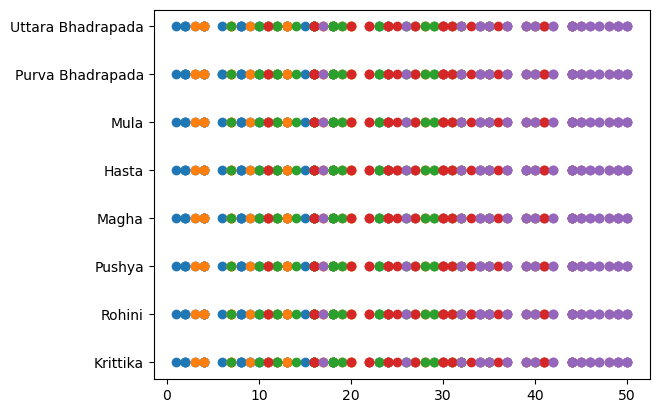

In [50]:
plt.scatter(x="1st Num", y="Nakshatra", data=df)
plt.scatter(x="2nd Num", y="Nakshatra", data=df)
plt.scatter(x="3rd Num", y="Nakshatra", data=df)
plt.scatter(x="4th Num", y="Nakshatra", data=df)
plt.scatter(x="5th Num", y="Nakshatra", data=df)
plt.show()

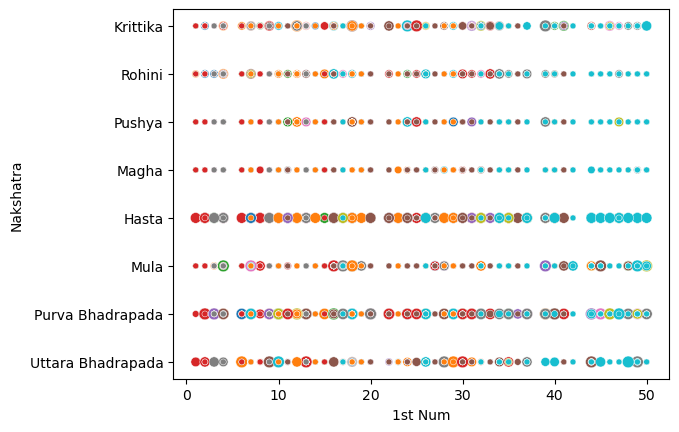

In [51]:
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-4",legend=False)
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-4",legend=False)
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-4",legend=False)
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-4",legend=False)
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-4",legend=False)
plt.show()

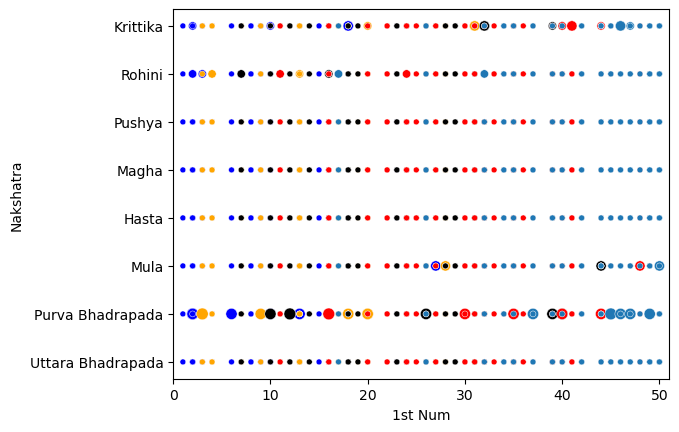

In [56]:
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-1",legend=False, color='blue')
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-1",legend=False, color='orange')
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-1",legend=False, color='black')
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-1",legend=False, color='red')
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-1",legend=False)

# sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-2",legend=False,color='blue')
# sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-2",legend=False, color='orange')
# sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-2",legend=False, color='black')
# sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-2",legend=False, color='red')
# sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-2",legend=False)

# sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-3",legend=False, color='blue')
# sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-3",legend=False, color='orange')
# sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-3",legend=False, color='black')
# sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-3",legend=False, color='red')
# sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-3",legend=False)

# sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-4",legend=False, color='blue')
# sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-4",legend=False, color='orange')
# sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-4",legend=False, color='black')
# sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-4",legend=False, color='red')
# sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-4",legend=False)


plt.xlim([0,51])
plt.show()

In [18]:
sf.tail(50)

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
1525,Train,Friday,Ardra,NaN,NaN,NaN,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10
1526,Train,Friday,Punarvasu,NaN,NaN,1.0,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10
1527,Train,Friday,Pushya,NaN,6.0,NaN,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10
1528,Train,Friday,Ashlesha,NaN,5.0,NaN,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10
1529,Train,Friday,Magha,NaN,NaN,NaN,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10
1530,Train,Friday,Purva Phalguni,NaN,NaN,NaN,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10
1531,Train,Friday,Uttara Phalguni,NaN,NaN,NaN,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10
1532,Train,Friday,Hasta,NaN,2.0,NaN,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10
1533,Train,Friday,Hasta,NaN,7.0,NaN,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10
1534,Train,Friday,Chitra,NaN,NaN,NaN,NaN,12,18,24,25,39,8,10,12 18 24 25 39 8 10


In [19]:
sf.set_index(keys = ["Day", "Nakshatra"], inplace=True)
sf.head()

Data  Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  \
Day     Nakshatra                                                               
Tuesday Ashwini       Train     NaN     NaN     NaN     3.0        7       15   
        Bharani       Train     NaN     NaN     NaN     NaN        7       15   
        Krittika      Train     NaN     NaN     NaN     NaN        7       15   
        Rohini        Train     NaN     NaN     NaN     NaN        7       15   
        Mrigashirsha  Train     NaN     NaN     NaN     NaN        7       15   

                      3rd Num  4th Num  5th Num  1st Lucky Star  \
Day     Nakshatra                                                 
Tuesday Ashwini            18       46       49              10   
        Bharani            18       46       49              10   
        Krittika           18       46       49              10   
        Rohini             18       46       49              10   
        Mrigashirsha       18       46       49              10   

                      2nd Lucky Star      Winning Numbers  
Day     Nakshatra                                          
Tuesday Ashwini                   12  7 15 18 46 49 10 12  
        Bharani                   12  7 15 18 46 49 10 12  
        Krittika                  12  7 15 18 46 49 10 12  
        Rohini                    12  7 15 18 46 49 10 12  
        Mrigashirsha              12  7 15 18 46 49 10 12

In [20]:
sf.drop(labels=["Data"], axis=1, inplace=True)
sf.head()

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  \
Day     Nakshatra                                                        
Tuesday Ashwini          NaN     NaN     NaN     3.0        7       15   
        Bharani          NaN     NaN     NaN     NaN        7       15   
        Krittika         NaN     NaN     NaN     NaN        7       15   
        Rohini           NaN     NaN     NaN     NaN        7       15   
        Mrigashirsha     NaN     NaN     NaN     NaN        7       15   

                      3rd Num  4th Num  5th Num  1st Lucky Star  \
Day     Nakshatra                                                 
Tuesday Ashwini            18       46       49              10   
        Bharani            18       46       49              10   
        Krittika           18       46       49              10   
        Rohini             18       46       49              10   
        Mrigashirsha       18       46       49              10   

                      2nd Lucky Star      Winning Numbers  
Day     Nakshatra                                          
Tuesday Ashwini                   12  7 15 18 46 49 10 12  
        Bharani                   12  7 15 18 46 49 10 12  
        Krittika                  12  7 15 18 46 49 10 12  
        Rohini                    12  7 15 18 46 49 10 12  
        Mrigashirsha              12  7 15 18 46 49 10 12

In [21]:
sf.fillna(value={"Pada-1":0, "Pada-2":0, "Pada-3":0, "Pada-4":0},inplace=True)

In [22]:
sf["Pada-1"] = sf["Pada-1"].astype(dtype='int32')
sf["Pada-2"] = sf["Pada-2"].astype(dtype='int32')
sf["Pada-3"] = sf["Pada-3"].astype(dtype='int32')
sf["Pada-4"] = sf["Pada-4"].astype(dtype='int32')

In [23]:
sf.index

MultiIndex([('Tuesday',           'Ashwini'),
            ('Tuesday',           'Bharani'),
            ('Tuesday',          'Krittika'),
            ('Tuesday',            'Rohini'),
            ('Tuesday',      'Mrigashirsha'),
            ('Tuesday',             'Ardra'),
            ('Tuesday',         'Punarvasu'),
            ('Tuesday',            'Pushya'),
            ('Tuesday',          'Ashlesha'),
            ('Tuesday',             'Magha'),
            ...
            ('Tuesday',          'Jyeshtha'),
            ('Tuesday',              'Mula'),
            ('Tuesday',     'Purva Ashadha'),
            ('Tuesday',    'Uttara Ashadha'),
            ('Tuesday',           'Sravana'),
            ('Tuesday',         'Dhanishta'),
            ('Tuesday',       'Shatabhisha'),
            ('Tuesday',  'Purva Bhadrapada'),
            ('Tuesday', 'Uttara Bhadrapada'),
            ('Tuesday',           'Revathi')],
           names=['Day', 'Nakshatra'], length=1575)

In [24]:
# ((astro["Nakshatra"]=="Punarvasu") | (astro["Nakshatra"]=="Hasta") | (astro["Nakshatra"]=="Krittika") | 
#                                  (astro["Nakshatra"]=="Ashlesha") | (astro["Nakshatra"]=="Rohini") | (astro["Nakshatra"]=="Pushya") |
#                                  (astro["Nakshatra"]=="Purva Bhadrapada") | (astro["Nakshatra"]=="Uttara Bhadrapada"))

In [25]:
sf.loc[("Friday", "Punarvasu")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day    Nakshatra                                                              
Friday Punarvasu       0       0       0       0        4        7       18   
       Punarvasu       0       0       0       0       16       17       18   
       Punarvasu       0       0       0       0       27       28       44   
       Punarvasu       0       0       0       0        8       19       32   
       Punarvasu       0       0       0       0       13       20       23   
       Punarvasu       0       0       0       0       23       24       35   
       Punarvasu       0       0       0       0        8       13       14   
       Punarvasu       0       0       0       0       24       27       28   
       Punarvasu       0       0       0       0        4        7       19   
       Punarvasu       0       0       0       0        8       11       12   
       Punarvasu       0       0       0       0        1        4       31   
       Punarvasu       0       0       0       0        8       11       23   
       Punarvasu       0       0       0       0       16       17       35   
       Punarvasu       0       0       0       0       13       18       26   
       Punarvasu       0       0       0       0        2        3       12   
       Punarvasu       0       0       0       0       10       20       40   
       Punarvasu       0       0       0       0        2       20       39   
       Punarvasu       0       0       0       0        6        9       10   
       Punarvasu       0       0       0       0       13       28       29   
       Punarvasu       0       0       0       0       18       31       32   
       Punarvasu       0       0       0       0        9       12       18   
       Punarvasu       0       0       0       0        4        7       16   
       Punarvasu       0       0       0       0       15       16       26   
       Punarvasu       0       0       0       0        2       13       16   
       Punarvasu       0       0       0       0        3        4        7   
       Punarvasu       6       0       5       0       10       16       18   
       Punarvasu       0       1       6       0       11       13       29   
       Punarvasu       0       0       1       0       12       18       24   

                  4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day    Nakshatra                                                     
Friday Punarvasu       39       50               3               8   
       Punarvasu       45       49               9              12   
       Punarvasu       48       50               7              12   
       Punarvasu       41       42               9              12   
       Punarvasu       27       42               5               9   
       Punarvasu       37       45               9              12   
       Punarvasu       24       26               1               2   
       Punarvasu       30       49               1              12   
       Punarvasu       20       34               2               4   
       Punarvasu       16       44               4               7   
       Punarvasu       34       40               4               5   
       Punarvasu       32       44               9              10   
       Punarvasu       36       49               1              10   
       Punarvasu       35       37               8              11   
       Punarvasu       16       45               2              11   
       Punarvasu       44       46               1               3   
       Punarvasu       40       47               4               8   
       Punarvasu       30       49               3               4   
       Punarvasu       44       48               4              12   
       Punarvasu       41       46               1              10   
       Punarvasu       22       50               1               3   
       Punarvasu       33       34   

In [26]:
sf.loc[("Friday", "Hasta")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day    Nakshatra                                                              
Friday Hasta           0       0       0       0        4        7       18   
       Hasta           0       0       0       0       16       17       18   
       Hasta           0       0       0       0       27       28       44   
       Hasta           0       0       0       0        8       19       32   
       Hasta           0       0       0       0       13       20       23   
       Hasta           0       0       0       7       23       24       35   
       Hasta           0       0       0       7        8       13       14   
       Hasta           0       0       0       7       24       27       28   
       Hasta           0       0       0       7        4        7       19   
       Hasta           0       0       0       7        8       11       12   
       Hasta           0       0       0       7        1        4       31   
       Hasta           0       0       0       7        8       11       23   
       Hasta           0       0       0       7       16       17       35   
       Hasta           0       0       0       7       13       18       26   
       Hasta           0       0       0       7        2        3       12   
       Hasta           0       0       0       7       10       20       40   
       Hasta           0       0       0       7        2       20       39   
       Hasta           0       0       0       7        6        9       10   
       Hasta           0       0       0       7       13       28       29   
       Hasta           0       0       0       7       18       31       32   
       Hasta           0       0       0       7        9       12       18   
       Hasta           0       0       7       0        4        7       16   
       Hasta           0       0       7       0       15       16       26   
       Hasta           0       0       7       0        2       13       16   
       Hasta           0       0       7       0        3        4        7   
       Hasta           0       0       7       0       10       16       18   
       Hasta           0       0       7       0       11       13       29   
       Hasta           0       2       0       0       12       18       24   
       Hasta           0       7       0       0       12       18       24   

                  4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day    Nakshatra                                                     
Friday Hasta           39       50               3               8   
       Hasta           45       49               9              12   
       Hasta           48       50               7              12   
       Hasta           41       42               9              12   
       Hasta           27       42               5               9   
       Hasta           37       45               9              12   
       Hasta           24       26               1               2   
       Hasta           30       49               1              12   
       Hasta           20       34               2               4   
       Hasta           16       44               4               7   
       Hasta           34       40               4               5   
       Hasta           32       44               9              10   
       Hasta           36       49               1              10   
       Hasta           35       37               8              11   
       Hasta           16       45               2              11   
       Hasta           44       46               1               3   
       Hasta           40       47               4               8   
       Hasta           30       49               3               4   
       Hasta           44       48               4              12   
       Hasta           41       46               1              10   
       Hasta           22   

In [27]:
sf.loc[("Friday", "Krittika")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day    Nakshatra                                                              
Friday Krittika        0       0       0       0        4        7       18   
       Krittika        0       0       0       0       16       17       18   
       Krittika        0       0       0       0       27       28       44   
       Krittika        0       0       0       0        8       19       32   
       Krittika        0       0       0       0       13       20       23   
       Krittika        0       0       0       0       23       24       35   
       Krittika        0       0       2       0        8       13       14   
       Krittika        0       0       0       0       24       27       28   
       Krittika        0       0       0       0        4        7       19   
       Krittika        0       0       0       0        8       11       12   
       Krittika        0       0       0       0        1        4       31   
       Krittika        0       0       0       0        8       11       23   
       Krittika        0       0       0       0       16       17       35   
       Krittika        0       0       0       0       13       18       26   
       Krittika        0       0       0       0        2        3       12   
       Krittika        3       0       0       0       10       20       40   
       Krittika        3       0       0       0        2       20       39   
       Krittika        0       3       0       0        6        9       10   
       Krittika        0       3       0       0       13       28       29   
       Krittika        6       0       1       0       18       31       32   
       Krittika        6       0       3       0       18       31       32   
       Krittika        0       0       3       1        9       12       18   
       Krittika        0       0       0       6        9       12       18   
       Krittika        0       5       0       3        4        7       16   
       Krittika        0       0       0       3       15       16       26   
       Krittika        0       0       0       0        2       13       16   
       Krittika        0       0       0       0        3        4        7   
       Krittika        0       0       0       0       10       16       18   
       Krittika        0       0       0       0       11       13       29   
       Krittika        0       9       0       0       12       18       24   

                  4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day    Nakshatra                                                     
Friday Krittika        39       50               3               8   
       Krittika        45       49               9              12   
       Krittika        48       50               7              12   
       Krittika        41       42               9              12   
       Krittika        27       42               5               9   
       Krittika        37       45               9              12   
       Krittika        24       26               1               2   
       Krittika        30       49               1              12   
       Krittika        20       34               2               4   
       Krittika        16       44               4               7   
       Krittika        34       40               4               5   
       Krittika        32       44               9              10   
       Krittika        36       49               1              10   
       Krittika        35       37               8              11   
       Krittika        16       45               2              11   
       Krittika        44       46               1               3   
       Krittika        40       47               4               8   
       Krittika        30       49               3               4   
       Krittika        44       48               4              12   
       Krittika    

In [28]:
sf.loc[("Friday", "Ashlesha")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day    Nakshatra                                                              
Friday Ashlesha        0       0       0       0        4        7       18   
       Ashlesha        0       0       0       0       16       17       18   
       Ashlesha        0       0       0       0       27       28       44   
       Ashlesha        0       0       2       0        8       19       32   
       Ashlesha        0       0       0       0       13       20       23   
       Ashlesha        0       0       0       0       23       24       35   
       Ashlesha        0       0       0       0        8       13       14   
       Ashlesha        0       0       0       0       24       27       28   
       Ashlesha        0       0       0       0        4        7       19   
       Ashlesha        0       0       0       0        8       11       12   
       Ashlesha        0       0       0       0        1        4       31   
       Ashlesha        0       0       0       0        8       11       23   
       Ashlesha        0       0       0       0       16       17       35   
       Ashlesha        0       0       0       0       13       18       26   
       Ashlesha        0       0       0       0        2        3       12   
       Ashlesha        0       0       0       0       10       20       40   
       Ashlesha        0       0       0       0        2       20       39   
       Ashlesha        0       0       0       0        6        9       10   
       Ashlesha        0       0       0       0       13       28       29   
       Ashlesha        0       0       0       0       18       31       32   
       Ashlesha        0       0       0       0        9       12       18   
       Ashlesha        0       0       0       0        4        7       16   
       Ashlesha        0       0       0       0       15       16       26   
       Ashlesha        0       0       0       0        2       13       16   
       Ashlesha        0       0       0       0        3        4        7   
       Ashlesha        0       0       0       0       10       16       18   
       Ashlesha        0       0       0       0       11       13       29   
       Ashlesha        0       5       0       0       12       18       24   

                  4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day    Nakshatra                                                     
Friday Ashlesha        39       50               3               8   
       Ashlesha        45       49               9              12   
       Ashlesha        48       50               7              12   
       Ashlesha        41       42               9              12   
       Ashlesha        27       42               5               9   
       Ashlesha        37       45               9              12   
       Ashlesha        24       26               1               2   
       Ashlesha        30       49               1              12   
       Ashlesha        20       34               2               4   
       Ashlesha        16       44               4               7   
       Ashlesha        34       40               4               5   
       Ashlesha        32       44               9              10   
       Ashlesha        36       49               1              10   
       Ashlesha        35       37               8              11   
       Ashlesha        16       45               2              11   
       Ashlesha        44       46               1               3   
       Ashlesha        40       47               4               8   
       Ashlesha        30       49               3               4   
       Ashlesha        44       48               4              12   
       Ashlesha        41       46               1              10   
       Ashlesha        22       50               1               3   
       Ashlesha        33       34   

In [29]:
sf.loc[("Friday", "Rohini")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day    Nakshatra                                                              
Friday Rohini          0       0       0       0        4        7       18   
       Rohini          0       0       0       0       16       17       18   
       Rohini          0       0       0       0       27       28       44   
       Rohini          0       0       0       0        8       19       32   
       Rohini          0       0       0       0       13       20       23   
       Rohini          0       0       0       0       23       24       35   
       Rohini          0       0       0       0        8       13       14   
       Rohini          0       0       0       0       24       27       28   
       Rohini          0       0       0       0        4        7       19   
       Rohini          0       0       0       0        8       11       12   
       Rohini          0       2       0       0        1        4       31   
       Rohini          0       0       0       0        8       11       23   
       Rohini          0       0       0       0       16       17       35   
       Rohini          0       0       0       0       13       18       26   
       Rohini          0       0       0       0        2        3       12   
       Rohini          0       0       0       0       10       20       40   
       Rohini          0       0       0       0        2       20       39   
       Rohini          0       0       0       0        6        9       10   
       Rohini          0       0       0       0       13       28       29   
       Rohini          0       0       0       0       18       31       32   
       Rohini          0       0       0       0        9       12       18   
       Rohini          0       1       0       0        4        7       16   
       Rohini          0       6       0       0        4        7       16   
       Rohini          0       5       0       0       15       16       26   
       Rohini          3       0       0       0        2       13       16   
       Rohini          3       0       0       0        3        4        7   
       Rohini          0       3       0       0       10       16       18   
       Rohini          0       3       0       0       11       13       29   
       Rohini          0       3       0       0       12       18       24   

                  4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day    Nakshatra                                                     
Friday Rohini          39       50               3               8   
       Rohini          45       49               9              12   
       Rohini          48       50               7              12   
       Rohini          41       42               9              12   
       Rohini          27       42               5               9   
       Rohini          37       45               9              12   
       Rohini          24       26               1               2   
       Rohini          30       49               1              12   
       Rohini          20       34               2               4   
       Rohini          16       44               4               7   
       Rohini          34       40               4               5   
       Rohini          32       44               9              10   
       Rohini          36       49               1              10   
       Rohini          35       37               8              11   
       Rohini          16       45               2              11   
       Rohini          44       46               1               3   
       Rohini          40       47               4               8   
       Rohini          30       49               3               4   
       Rohini          44       48               4              12   
       Rohini          41       46               1              10   
       Rohini          22   

In [30]:
sf.loc[("Friday", "Pushya")][:] 

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day    Nakshatra                                                              
Friday Pushya          0       0       0       0        4        7       18   
       Pushya          0       0       0       0       16       17       18   
       Pushya          0       0       0       0       27       28       44   
       Pushya          0       0       0       0        8       19       32   
       Pushya          0       0       0       0       13       20       23   
       Pushya          0       0       0       0       23       24       35   
       Pushya          0       0       0       0        8       13       14   
       Pushya          0       0       0       0       24       27       28   
       Pushya          0       0       0       0        4        7       19   
       Pushya          0       0       0       0        8       11       12   
       Pushya          0       0       0       0        1        4       31   
       Pushya          0       0       0       0        8       11       23   
       Pushya          0       0       0       0       16       17       35   
       Pushya          0       0       0       0       13       18       26   
       Pushya          0       0       0       0        2        3       12   
       Pushya          0       0       0       0       10       20       40   
       Pushya          0       0       0       0        2       20       39   
       Pushya          0       0       0       0        6        9       10   
       Pushya          0       0       0       0       13       28       29   
       Pushya          0       0       0       0       18       31       32   
       Pushya          0       0       0       0        9       12       18   
       Pushya          0       0       0       0        4        7       16   
       Pushya          0       0       0       0       15       16       26   
       Pushya          0       0       0       0        2       13       16   
       Pushya          0       0       0       0        3        4        7   
       Pushya          0       0       0       0       10       16       18   
       Pushya          0       0       5       0       11       13       29   
       Pushya          0       6       0       0       12       18       24   

                  4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day    Nakshatra                                                     
Friday Pushya          39       50               3               8   
       Pushya          45       49               9              12   
       Pushya          48       50               7              12   
       Pushya          41       42               9              12   
       Pushya          27       42               5               9   
       Pushya          37       45               9              12   
       Pushya          24       26               1               2   
       Pushya          30       49               1              12   
       Pushya          20       34               2               4   
       Pushya          16       44               4               7   
       Pushya          34       40               4               5   
       Pushya          32       44               9              10   
       Pushya          36       49               1              10   
       Pushya          35       37               8              11   
       Pushya          16       45               2              11   
       Pushya          44       46               1               3   
       Pushya          40       47               4               8   
       Pushya          30       49               3               4   
       Pushya          44       48               4              12   
       Pushya          41       46               1              10   
       Pushya          22       50               1               3   
       Pushya          33       34   

In [31]:
sf.loc[("Friday", "Purva Bhadrapada")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  \
Day    Nakshatra                                                            
Friday Purva Bhadrapada       0       0       0       0        4        7   
       Purva Bhadrapada       0       0       0       0       16       17   
       Purva Bhadrapada       0       0       0       0       27       28   
       Purva Bhadrapada       0       0       0       0        8       19   
       Purva Bhadrapada       0       0       0       0       13       20   
       Purva Bhadrapada       0       0       0       0       23       24   
       Purva Bhadrapada       0       0       0       0        8       13   
       Purva Bhadrapada       0       0       0       0       24       27   
       Purva Bhadrapada       0       0       0       0        4        7   
       Purva Bhadrapada       0       1       0       5        8       11   
       Purva Bhadrapada       0       0       0       1        1        4   
       Purva Bhadrapada       0       0       0       0        8       11   
       Purva Bhadrapada       0       0       6       0       16       17   
       Purva Bhadrapada       8       0       0       0       13       18   
       Purva Bhadrapada       8       0       0       0        2        3   
       Purva Bhadrapada       9       0       0       0        2        3   
       Purva Bhadrapada       8       0       9       0       10       20   
       Purva Bhadrapada       8       0       0       9        2       20   
       Purva Bhadrapada       2       0       0       0        6        9   
       Purva Bhadrapada       8       0       0       0        6        9   
       Purva Bhadrapada       0       8       0       0       13       28   
       Purva Bhadrapada       0       8       0       0       18       31   
       Purva Bhadrapada       0       8       0       0        9       12   
       Purva Bhadrapada       0       8       0       2        4        7   
       Purva Bhadrapada       0       8       0       0       15       16   
       Purva Bhadrapada       0       8       0       0        2       13   
       Purva Bhadrapada       0       8       0       0        3        4   
       Purva Bhadrapada       0       8       0       0       10       16   
       Purva Bhadrapada       0       8       0       0       11       13   
       Purva Bhadrapada       0       8       0       0       12       18   

                         3rd Num  4th Num  5th Num  1st Lucky Star  \
Day    Nakshatra                                                     
Friday Purva Bhadrapada       18       39       50               3   
       Purva Bhadrapada       18       45       49               9   
       Purva Bhadrapada       44       48       50               7   
       Purva Bhadrapada       32       41       42               9   
       Purva Bhadrapada       23       27       42               5   
       Purva Bhadrapada       35       37       45               9   
       Purva Bhadrapada       14       24       26               1   
       Purva Bhadrapada       28       30       49               1   
       Purva Bhadrapada       19       20       34               2   
       Purva Bhadrapada       12       16       44               4   
       Purva Bhadrapada       31       34       40               4   
       Purva Bhadrapada       23       32       44               9   
       Purva Bhadrapada       35       36       49               1   
       Purva Bhadrapada       26       35       37               8   
       Purva Bhadrapada       12       16       45               2   
       Purva Bhadrapada       12       16       45               2   
       Purva Bhadrapada       40       44       46               1   
       Purva Bhadrapada       39       40       47               4   
       Purva Bhadrapada       10       30       49               3   
       Purva Bhadrapada       10       30       49               3   
       Purva Bhadrap

In [32]:
sf.loc[("Friday", "Uttara Bhadrapada")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  \
Day    Nakshatra                                                             
Friday Uttara Bhadrapada       0       0       0       0        4        7   
       Uttara Bhadrapada       0       0       0       0       16       17   
       Uttara Bhadrapada       0       0       0       0       27       28   
       Uttara Bhadrapada       0       0       0       0        8       19   
       Uttara Bhadrapada       0       0       0       0       13       20   
       Uttara Bhadrapada       0       0       0       0       23       24   
       Uttara Bhadrapada       0       0       0       0        8       13   
       Uttara Bhadrapada       0       0       0       0       24       27   
       Uttara Bhadrapada       0       0       0       0        4        7   
       Uttara Bhadrapada       0       0       0       0        8       11   
       Uttara Bhadrapada       0       0       0       5        1        4   
       Uttara Bhadrapada       0       1       0       0        8       11   
       Uttara Bhadrapada       0       0       0       1       16       17   
       Uttara Bhadrapada       0       6       0       0       13       18   
       Uttara Bhadrapada       0       0       0       6        2        3   
       Uttara Bhadrapada       0       0       0       0       10       20   
       Uttara Bhadrapada       0       0       0       0        2       20   
       Uttara Bhadrapada       0       9       0       0        6        9   
       Uttara Bhadrapada       0       0       0       9       13       28   
       Uttara Bhadrapada       0       0       0       0       18       31   
       Uttara Bhadrapada       0       0       0       0        9       12   
       Uttara Bhadrapada       0       0       0       0        4        7   
       Uttara Bhadrapada       0       0       0       0       15       16   
       Uttara Bhadrapada       0       0       0       0        2       13   
       Uttara Bhadrapada       0       0       0       0        3        4   
       Uttara Bhadrapada       0       0       2       0       10       16   
       Uttara Bhadrapada       0       0       0       0       11       13   
       Uttara Bhadrapada       0       0       0       4       12       18   

                          3rd Num  4th Num  5th Num  1st Lucky Star  \
Day    Nakshatra                                                      
Friday Uttara Bhadrapada       18       39       50               3   
       Uttara Bhadrapada       18       45       49               9   
       Uttara Bhadrapada       44       48       50               7   
       Uttara Bhadrapada       32       41       42               9   
       Uttara Bhadrapada       23       27       42               5   
       Uttara Bhadrapada       35       37       45               9   
       Uttara Bhadrapada       14       24       26               1   
       Uttara Bhadrapada       28       30       49               1   
       Uttara Bhadrapada       19       20       34               2   
       Uttara Bhadrapada       12       16       44               4   
       Uttara Bhadrapada       31       34       40               4   
       Uttara Bhadrapada       23       32       44               9   
       Uttara Bhadrapada       35       36       49               1   
       Uttara Bhadrapada       26       35       37               8   
       Uttara Bhadrapada       12       16       45               2   
       Uttara Bhadrapada       40       44       46               1   
       Uttara Bhadrapada       39       40       47               4   
       Uttara Bhadrapada       10       30       49               3   
       Uttara Bhadrapada       29       44       48               4   
       Uttara Bhadrapada       32       41       46               1   
       Uttara Bhadrapada       18       22       50               1   
       Uttara Bhadrapada       16       33       34 

<Axes: xlabel='1st Lucky Star', ylabel='Nakshatra'>

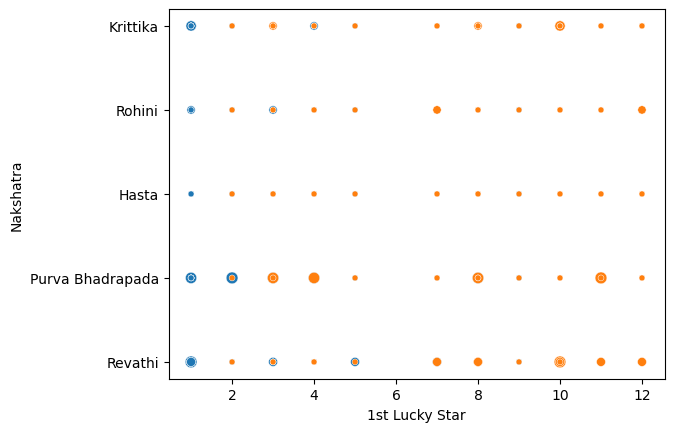

In [33]:
sns.scatterplot(data=df, x="1st Lucky Star", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="2nd Lucky Star", y="Nakshatra",size="Pada-1",legend=False)

# sns.scatterplot(data=df, x="1st Lucky Star", y="Nakshatra",size="Pada-2",legend=False)
# sns.scatterplot(data=df, x="2nd Lucky Star", y="Nakshatra",size="Pada-2",legend=False)

# sns.scatterplot(data=df, x="1st Lucky Star", y="Nakshatra",size="Pada-3",legend=False)
# sns.scatterplot(data=df, x="2nd Lucky Star", y="Nakshatra",size="Pada-3",legend=False)

# sns.scatterplot(data=df, x="1st Lucky Star", y="Nakshatra",size="Pada-4",legend=False)
# sns.scatterplot(data=df, x="2nd Lucky Star", y="Nakshatra",size="Pada-4",legend=False)